### Boolean satisfiability problem

Any Booolean function can be represented in conjunctive normal form, that is, a conjunction of clauses, which are disjuntions of 3 literals:

$$
f(x) = (\neg{x_1} \vee x_3 \vee x_6) \wedge (x_2 \vee \neg{x_4} \vee x_5) \wedge \dots
$$

The 3-satisfiability problem (3-SAT) is as follows: given a Boolean function $f$ in conjunctive normal form, is there any input $x$ such that $f(x) = 1$?

This problem is NP-complete, i.e. any problem in class NP can be reduced to 3-SAT. For any $k>3$, k-SAT can be reduced to 3-SAT, but 2-SAT is solvable in polynomial time.

In [95]:
import numpy as np
import pycosat
import matplotlib.pyplot as plt
import time

In [59]:
def random_clause(num_variables, k=3):
    '''Generate a random clause for k-SAT. Returns a list of three
    integers
    '''
    clause = np.random.choice(num_variables, k, replace=False) + 1
    clause = [int(c * ((-1)**np.random.randint(2))) for c in clause]
    return clause

def random_SAT_instance(num_variables, num_clauses, k=3):
    '''
    Generate a random instance of K-SAT
    '''
    return [random_clause(num_variables, k) for i in range(num_clauses)]

def is_satisfiable(instance):
    '''Decide if a SAT instance is satisfiable'''
    answer = pycosat.solve(instance)
    if type(answer) is list:
        return True
    elif answer == 'UNSAT':
        return False
    elif answer == 'UNKNOWN':
        return None

Let us consider a random SAT instance with $C$ clauses and $V$ variables (the code above allows duplicate clauses, but for large $C, V$ that is insignificant). Then the clause density $C/V$ is an "order parameter" for the problem: below a certain threshold, random instances almost always end up satisfiable, and above it -- almost always unsatisfiable. What is the critical value of critical clause density for 3-SAT? For 2-SAT? How does the runtime scale with the clause density?

In [111]:
def get_sat_ratio(n_variables, n_clauses, n_samples, k=3):
    '''Solve n_samples random instances and 
    return the portion of the satisfiable ones'''
    results_total = []
    for i in range(n_samples):
        instance = random_SAT_instance(n_variables, n_clauses, k=k)
        result = is_satisfiable(instance)
        results_total.append(result)
    print('{} undecided instances'.format(results_total.count(None)))
    return results_total.count(True) / n_samples

In [120]:
n_variables = 200
n_samples = 100
clause_densities = [0.5 * i for i in range(3, 15)]
sat_ratios = []
times = []
for density in clause_densities:
    n_clauses = int(n_variables * density)
    t_0 = time.time()
    sat_ratios.append(get_sat_ratio(n_variables, n_clauses, n_samples, k=3))
    dt = (time.time() - t_0) / n_clauses
    times.append(dt)

0 undecided instances
0 undecided instances
0 undecided instances
0 undecided instances
0 undecided instances
0 undecided instances
0 undecided instances
0 undecided instances
0 undecided instances
0 undecided instances
0 undecided instances
0 undecided instances


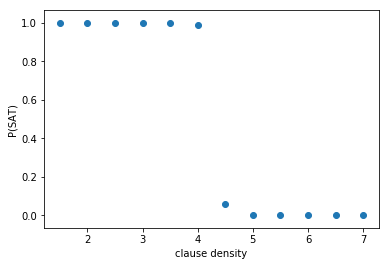

In [122]:
plt.scatter(clause_densities, sat_ratios)
plt.xlabel('clause density')
plt.ylabel('P(SAT)')
plt.show()